In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [42]:
%matplotlib notebook

In [43]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [44]:
##Force Calibration with single freq, with xyz2

In [45]:
Year=2019
Month=12
Day=30
BeadN=1

In [6]:
ResX=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=27+i
    SigFreq=151
    if Day<10:
        fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)
    else: 
        fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)        
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResX[i]=np.sqrt(xpsd[SigFreq*10])
    print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.007744169487814622
0.007744916514154155
0.007757235322692401
0.00774353796876276
0.007752122728418676


In [7]:
ResY=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=32+i
    SigFreq=151
    if Day<10:
        fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)
    else: 
        fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)        
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResY[i]=np.sqrt(ypsd[SigFreq*10])    
    #print(np.sqrt(xpsd[SigFreq*10]))
    print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.0062893835926392345
0.006316367277072371
0.006299222414976697
0.006314243039577623
0.006360333738847092


In [8]:
ResZ=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=37+i
    SigFreq=151
    if Day<10:
        fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)
    else: 
        fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/Discharge/Discharge_%d.h5" % (Year, Month, Day, BeadN,Ndata)        
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResZ[i]=np.sqrt(zpsd[SigFreq*10])    
    print(np.sqrt(zpsd[SigFreq*10]))
    

19778.034250888613
19464.216974966865
19804.024234161945
19649.283063686173
19720.327267551318


In [9]:
q=25
V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
print(F)

6.054069767441861e-15


In [10]:
AveX=np.average(ResX)
AveY=np.average(ResY)
AveZ=np.average(ResZ)
BtoFx=F/AveX
BtoFy=F/AveY
BtoFz=F/AveZ
print(BtoFx)
print(BtoFy)
print(BtoFz)

7.813319623178536e-13
9.585427524050463e-13
3.075758409715912e-19


In [12]:
##code for Transfer Function

In [11]:
##X preparation
NdataX=7
if Day<10:
    fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/TransFunc/TransFunc_X_%d.h5" % (Year, Month, Day, BeadN,NdataX)
else: 
    fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/TransFunc/TransFunc_X_%d.h5" % (Year, Month, Day, BeadN,NdataX)        
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [12]:
##Y preparataion
NdataY=8
if Day<10:
    fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/TransFunc/TransFunc_Y_%d.h5" % (Year, Month, Day, BeadN,NdataY)
else: 
    fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/TransFunc/TransFunc_Y_%d.h5" % (Year, Month, Day, BeadN,NdataY)       
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz2 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [13]:
##Z preparation
NdataZ=9
if Day<10:
    fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/TransFunc/TransFunc_Z_%d.h5" % (Year, Month, Day, BeadN,NdataZ)
else: 
    fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/TransFunc/TransFunc_Z_%d.h5" % (Year, Month, Day,BeadN, NdataZ)        
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [14]:
#Here, there is no conversion factor
q=28
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX
FnoiseXY=XnoiseY
FnoiseXZ=XnoiseZ
FnoiseYX=YnoiseX
FnoiseYY=YnoiseY
FnoiseYZ=YnoiseZ
FnoiseZX=ZnoiseX
FnoiseZY=ZnoiseY
FnoiseZZ=ZnoiseZ

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [15]:
if Day<10:
    ofname = "/home/data_transfer/data_from_windows/%d%d0%d/Bead1/TransFunc/TFBead%d%d%d_Bit.txt" %(Year, Month, Day, NdataX,NdataY,NdataZ)
else: 
    ofname = "/home/data_transfer/data_from_windows/%d%d%d/Bead1/TransFunc/TFBead%d%d%d_Bit.txt" %(Year, Month, Day, NdataX,NdataY,NdataZ)


f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [36]:
Ndata=30
if Day<10:
    fname = r"/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/InitialTest/Data%d.h5" % (Year, Month, Day,BeadN, Ndata)
else: 
    fname = r"/home/data_transfer/data_from_windows/%d%d%d/Bead%d/InitialTest/Data%d.h5" % (Year, Month, Day, BeadN, Ndata)

print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 5000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=304.082
gx=45.408
w0y=286.087
gy=28.2833
w0z=269.515
gz=210.06
#BtoFx=3.32E-13
#BtoFy=3.88E-13
#BtoFz=2.12E-19

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/home/data_transfer/data_from_windows/20191230/Bead1/InitialTest/Data30.h5
No electrodes data here
No cantilever data


<IPython.core.display.Javascript object>


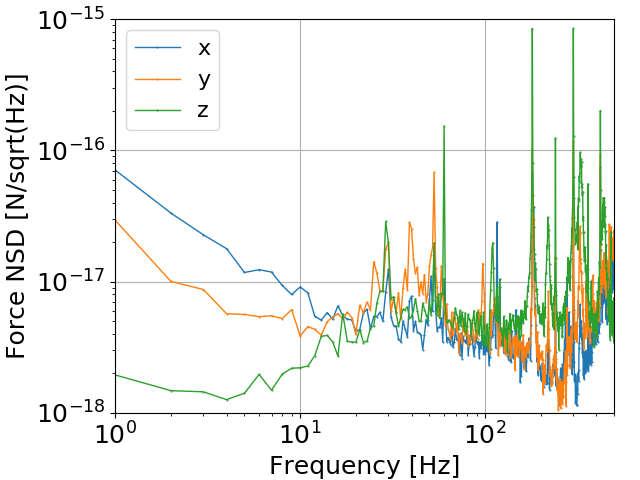

In [37]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
if Day<10:
    ofname='/home/data_transfer/data_from_windows/%d%d0%d/Bead%d/TransFunc/ForceSensitivity%d.png' % (Year,Month,Day,BeadN, Ndata)
else: 
    ofname='/home/data_transfer/data_from_windows/%d%d%d/Bead%d/TransFunc/ForceSensitivity%d.png' % (Year,Month,Day,BeadN, Ndata)



plt.savefig(ofname,dpi=300)

In [73]:
##1000 Data Analysis

In [39]:
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=7
Dx=7
for k in range(0,1000):
    NSubData=k
    
    if Day<10:
        fname = r'/data/new_trap/%d%d0%d/Bead1/Shaking/Shaking%d/Shaking%d_%d.h5' % (Year, Month, Day, Dx,Ndata,NSubData)
    else: 
        fname = r'/data/new_trap/%d%d%d/Bead1/Shaking/Shaking%d/Shaking%d_%d.h5' % (Year, Month, Day, Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)
 
    if Day<10:
        ofname="/home/data_transfer/data_from_windows/%d%d0%d/Bead1/Shaking/Shaking%d/XSignal%d_%d_%d.txt" % (Year, Month, Day, Dx,Dx,Ndata,NSubData)
    else: 
        ofname="/home/data_transfer/data_from_windows/%d%d%d/Bead1/Shaking/Shaking%d/XSignal%d_%d_%d.txt" % (Year, Month, Day, Dx,Dx,Ndata,NSubData)

    Fshake=13
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [47]:
#analyzing multiple data in single number-Analysis for Shaking 36
Nint=2
Nave=3
Ndata=36
Dx=36
for k in range(1,1000):
    NSubData=k
    
    if Day<10:
        fname = r'/data/new_trap/%d%d0%d/Bead1/Shaking/Shaking%d/Shaking%d_%d.h5' % (Year, Month, Day, Dx,Ndata,NSubData)
    else: 
        fname = r'/data/new_trap/%d%d%d/Bead1/Shaking/Shaking%d/Shaking%d_%d.h5' % (Year, Month, Day, Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)
 
    if Day<10:
        ofname="/home/data_transfer/data_from_windows/%d%d0%d/Bead1/Shaking/Shaking%d/XSignal%d_%d_%d.txt" % (Year, Month, Day, Dx,Dx,Ndata,NSubData)
    else: 
        ofname="/home/data_transfer/data_from_windows/%d%d%d/Bead1/Shaking/Shaking%d/XSignal%d_%d_%d.txt" % (Year, Month, Day, Dx,Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [49]:
##Extracting Cantilever Position Data for y

In [53]:
for j in range(0,1000):
    Ndata=370
    FileN=j
    fname = r'/data/new_trap/20191204/Bead1/Shaking/Shaking%d/Shaking2_%d.h5' % (Ndata,FileN)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.cant_pos
    ofname = "/data/new_trap/20191204/Bead1/Shaking/Shaking%d/CantPosY2_%d.txt" % (Ndata,FileN)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%f\n' % data[1][i])
    f1.close()

In [71]:
##Extracting QPD sum information

In [87]:
for j in range(26,45):
    Ndata=j
    fname = r'/home/data_transfer/data_from_windows/20190902/Bead1/Shaking/BeamProfile%d_0.h5' % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.quad_sum
    ofname = "../../Results/AkioK/BeamProfile%dQuadSumY.txt" % Ndata
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%d\n' % data[i])
    f1.close()